Weather Dataset — Complete Data Preprocessing
We will perform:
1. Data loading & exploration  
2. Missing value handling  
3. Train–test split (before encoding/scaling)  
4. Categorical encoding  
5. Feature scaling  
6. Outlier detection  
7. Visualization & correlation  
8. Save final cleaned data  




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="muted")


In [3]:
df = pd.read_csv("Weather.csv")

print("Shape:", df.shape)
display(df.head())


Shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Step 1: Explore the Dataset
We’ll check the structure, missing values, and overall data health.


In [4]:
df.info()
df.describe(include="all").T.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,145460,3436,2017-06-24,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,NaN,NaN,NaN,2.360918,8.47806,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,NaN,NaN,NaN,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,NaN,NaN,NaN,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,13.607062,6.0,31.0,39.0,48.0,135.0
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Missing Values Check
We'll visualize and count missing values to see which columns need imputation.


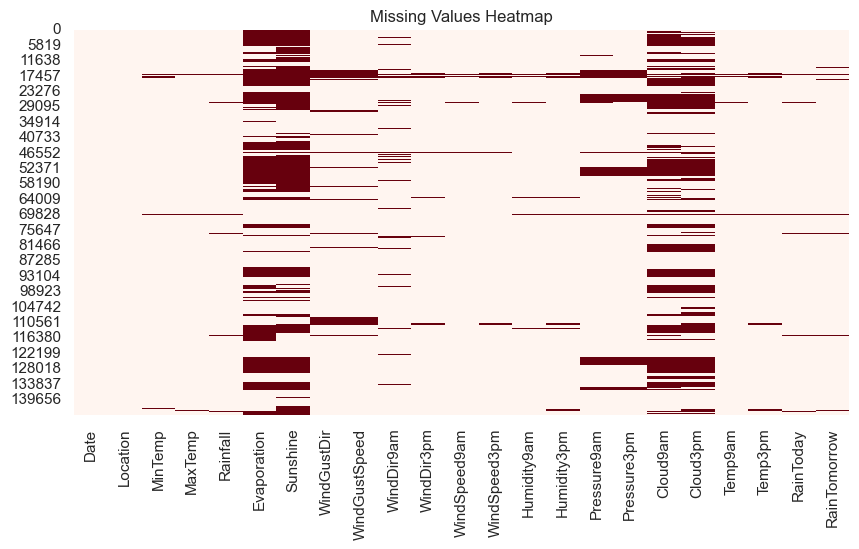

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Reds')
plt.title("Missing Values Heatmap")
plt.show()

df.isnull().sum()


Step 2: Basic Cleaning (Duplicates / Irrelevant Data)
We'll remove duplicates and reset the index before proceeding.


In [6]:
print("Before duplicate removal:", df.shape)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
print("After duplicate removal:", df.shape)


Before duplicate removal: (145460, 23)
After duplicate removal: (145460, 23)


Step 3: Train–Test Split (BEFORE Encoding & Scaling)
To avoid data leakage, we split first.  
This ensures all preprocessing statistics (mean, median, min, max, encoding maps) are learned **only from training data.**


In [7]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

split = int(0.8 * len(df))
train_df = df.iloc[:split, :].copy()
test_df  = df.iloc[split:, :].copy()

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (116368, 23)
Test shape: (29092, 23)


 Step 4: Handle Missing Values
We'll impute:
- Numerical columns: using median
- Categorical columns: using mode
We compute these only from the training data and apply the same to test data.


In [8]:
numeric_cols = train_df.select_dtypes(include=np.number).columns
cat_cols = train_df.select_dtypes(exclude=np.number).columns

train_medians = train_df[numeric_cols].median()
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_medians)
test_df[numeric_cols]  = test_df[numeric_cols].fillna(train_medians)

for col in cat_cols:
    mode_val = train_df[col].mode()[0]
    train_df[col].fillna(mode_val, inplace=True)
    test_df[col].fillna(mode_val, inplace=True)

print("✅ Missing values handled.")


✅ Missing values handled.


Step 5: Visualize Numeric Distributions
We’ll inspect distributions to spot skewness or potential outliers.


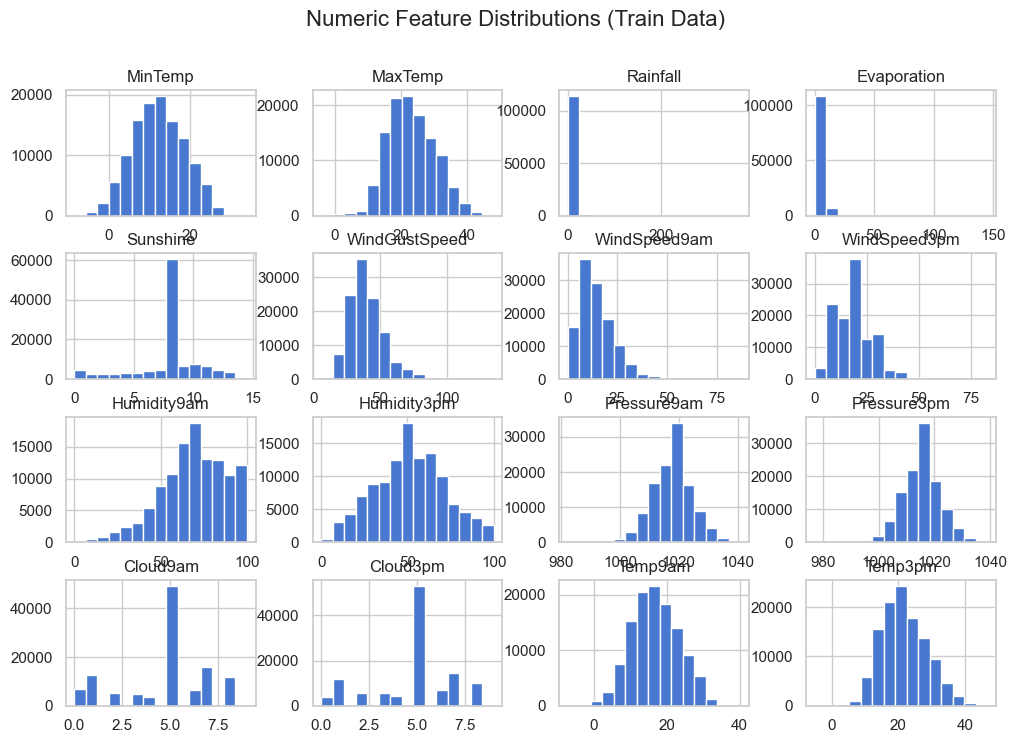

In [9]:
train_df[numeric_cols].hist(figsize=(12,8), bins=15)
plt.suptitle("Numeric Feature Distributions (Train Data)", fontsize=16)
plt.show()


Step 6: Outlier Detection & Treatment
We'll cap extreme values using the **IQR (Inter-Quartile Range)** method  
to prevent outliers from distorting our model.


In [10]:
for col in numeric_cols:
    Q1 = train_df[col].quantile(0.25)
    Q3 = train_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    train_df[col] = np.clip(train_df[col], lower, upper)
    test_df[col]  = np.clip(test_df[col], lower, upper)


Step 7: Encode Categorical Variables
We'll use simple **Label Encoding** (convert text to numeric codes).  
Each category from training data gets a number; unseen test categories = −1.


In [11]:
for col in cat_cols:
    train_df[col] = train_df[col].astype("category")
    cat_map = {cat: i for i, cat in enumerate(train_df[col].cat.categories)}

    train_df[col] = train_df[col].map(cat_map)
    test_df[col]  = test_df[col].map(cat_map).fillna(-1)  # handle unseen categories


 Step 8: Feature Scaling (Min–Max)
We’ll normalize numerical features between 0 and 1.  
All scaling parameters (min, max) are taken from **training data**.


In [12]:
min_vals = train_df[numeric_cols].min()
max_vals = train_df[numeric_cols].max()

train_df[numeric_cols] = (train_df[numeric_cols] - min_vals) / (max_vals - min_vals)
test_df[numeric_cols]  = (test_df[numeric_cols] - min_vals) / (max_vals - min_vals)


Step 9: Correlation Analysis
We'll plot a correlation heatmap to identify relationships between numerical features.


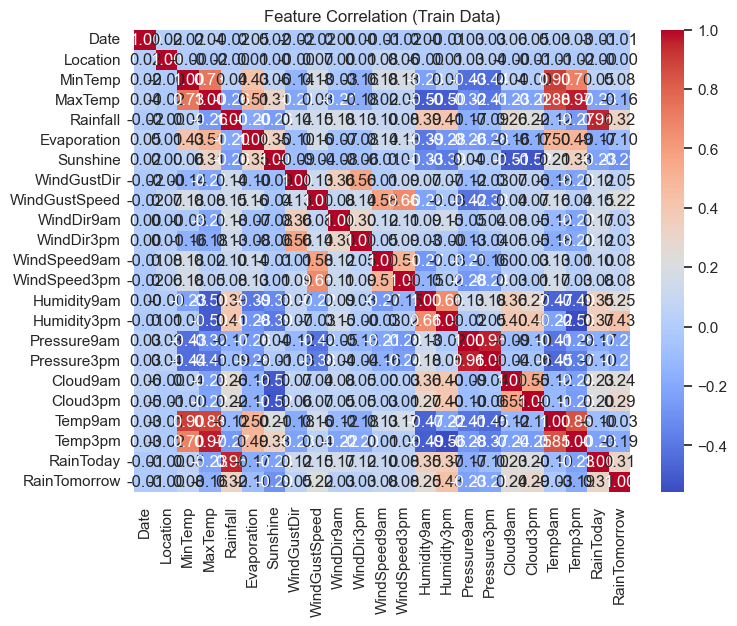

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation (Train Data)")
plt.show()


 Step 10: Save Final Cleaned Dataset
We'll save the cleaned, encoded, and scaled dataset for future use.


In [14]:
train_df.to_csv("Weather_Train_Cleaned.csv", index=False)
test_df.to_csv("Weather_Test_Cleaned.csv", index=False)
print("✅ Cleaned train and test datasets saved successfully!")


✅ Cleaned train and test datasets saved successfully!


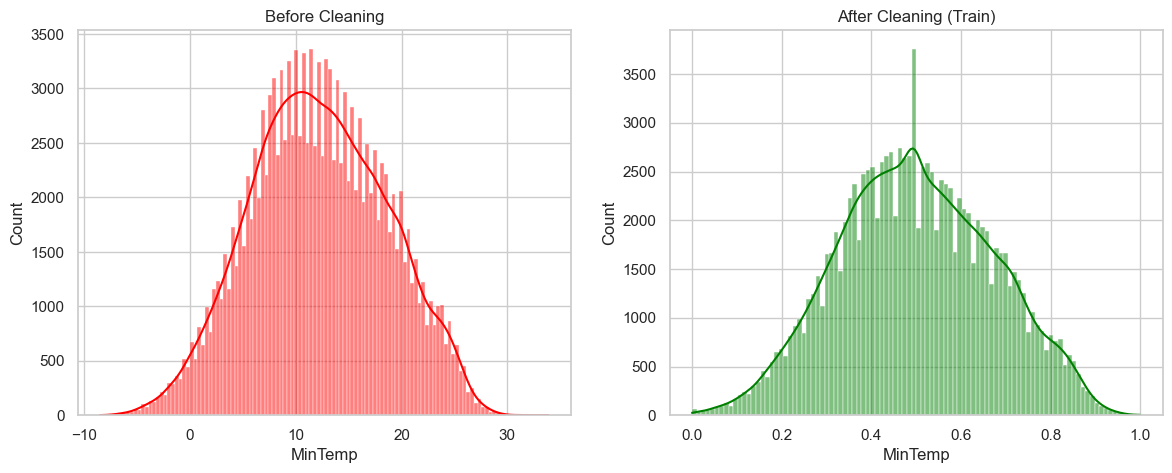

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))
sns.histplot(df[numeric_cols[0]], ax=axes[0], color='red', kde=True)
axes[0].set_title("Before Cleaning")

sns.histplot(train_df[numeric_cols[0]], ax=axes[1], color='green', kde=True)
axes[1].set_title("After Cleaning (Train)")
plt.show()
